In [46]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import dates
%matplotlib inline

In [2]:
my_year = 2020
my_month = 5
my_day = 31
my_hour = 11
my_min = 21
my_sec = 57


In [3]:
my_date = datetime(my_year, my_month, my_day)
my_date

datetime.datetime(2020, 5, 31, 0, 0)

In [4]:
my_datetime = datetime(my_year, my_month, my_day, my_hour, my_min, my_sec)
my_datetime

datetime.datetime(2020, 5, 31, 11, 21, 57)

In [9]:
np.arange('2019-11-19','2020-01-17',7, dtype='datetime64[D]')

array(['2019-11-19', '2019-11-26', '2019-12-03', '2019-12-10',
       '2019-12-17', '2019-12-24', '2019-12-31', '2020-01-07',
       '2020-01-14'], dtype='datetime64[D]')

In [12]:
pd.date_range('2020-01-01',  periods=7, freq='D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [13]:
pd.to_datetime(['01-01-2020', '01-25-2020'], format='%m-%d-%Y')

DatetimeIndex(['2020-01-01', '2020-01-25'], dtype='datetime64[ns]', freq=None)

In [15]:
data = np.random.randn(7,3)
df = pd.DataFrame(data, index=pd.date_range('2020-01-01',  periods=7, freq='D'))

In [16]:
df

,0,1,2
2020-01-01,-0.322711,0.980107,1.775368
2020-01-02,-0.591845,-0.079300,0.597142
2020-01-03,-0.182695,-0.760719,1.002766
2020-01-04,-0.916656,-3.295795,-0.170623
2020-01-05,0.909726,0.181514,-0.526849
2020-01-06,-0.338199,2.447126,0.716258
2020-01-07,0.438051,-1.687425,1.745861


In [17]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [19]:
df.index.max()

Timestamp('2020-01-07 00:00:00', freq='D')

In [20]:
df.index.min()

Timestamp('2020-01-01 00:00:00', freq='D')

In [21]:
df.index.argmax()

6

In [3]:
strb_df = pd.read_csv("../data/starbucks.csv", index_col='Date', parse_dates=True)

In [4]:
strb_df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [5]:
strb_df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [6]:
strb_df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [7]:
def last_day(entry):
    if len(entry):
        return entry[-1]

In [8]:
strb_df.resample(rule='A').apply(last_day)

,Close,Volume
Date,,
2015-12-31,56.7513,4960875
2016-12-31,53.2731,8344508
2017-12-31,56.1288,5365646
2018-12-31,64.4000,7690183


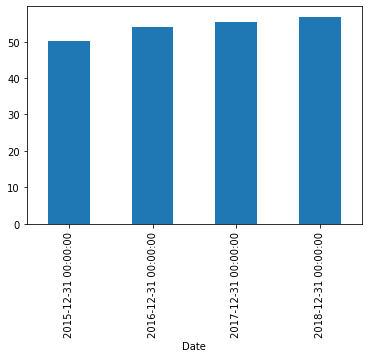

In [29]:
strb_df['Close'].resample(rule='A').mean().plot(kind='bar');

In [10]:
strb_df.shift(1)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0
...,...,...
2018-12-24,61.3900,23524888.0
2018-12-26,60.5600,6323252.0
2018-12-27,63.0800,16646238.0


In [11]:
strb_df.shift(-1).tail()

,Close,Volume
Date,,
2018-12-24,63.08,16646238.0
2018-12-26,63.20,11308081.0
2018-12-27,63.39,7712127.0
2018-12-28,64.40,7690183.0
2018-12-31,NaN,NaN


In [12]:
strb_df.index.max()

Timestamp('2018-12-31 00:00:00')

In [13]:
strb_df.shift(periods=2, freq='M')

,Close,Volume
Date,,
2015-02-28,38.0061,6906098
2015-02-28,37.2781,11623796
2015-02-28,36.9748,7664340
2015-02-28,37.8848,9732554
2015-02-28,38.4961,13170548
...,...,...
2019-01-31,60.5600,6323252
2019-01-31,63.0800,16646238
2019-01-31,63.2000,11308081


In [14]:
strb_df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


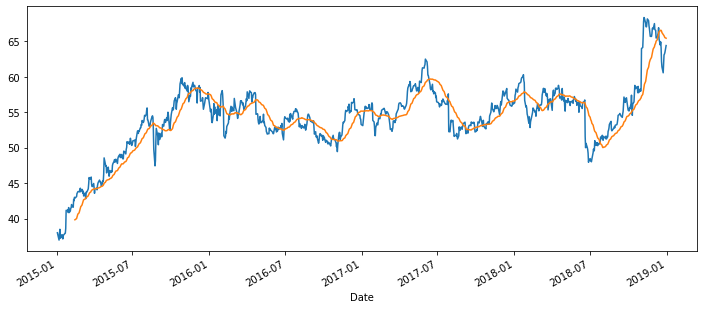

In [27]:
strb_df['Close'].plot()
strb_df['Close'].rolling(window=30).mean().plot(figsize=(12,5));

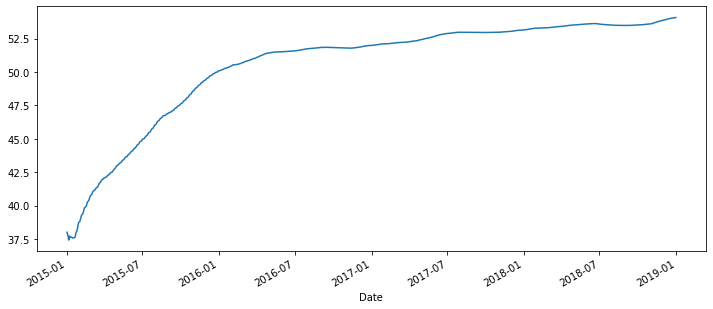

In [28]:
strb_df['Close'].expanding().mean().plot(figsize = (12,5));

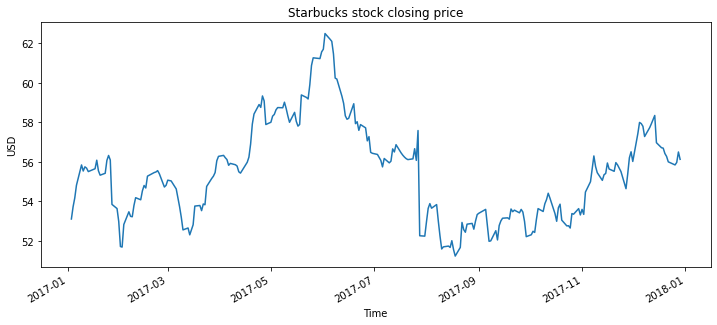

In [34]:
title = 'Starbucks stock closing price'
xlabel = 'Time'
ylabel = 'USD'
ax = strb_df['Close']['2017-01-01':'2017-12-31'].plot(figsize = (12,5), title=title);
ax.set(xlabel=xlabel, ylabel=ylabel);


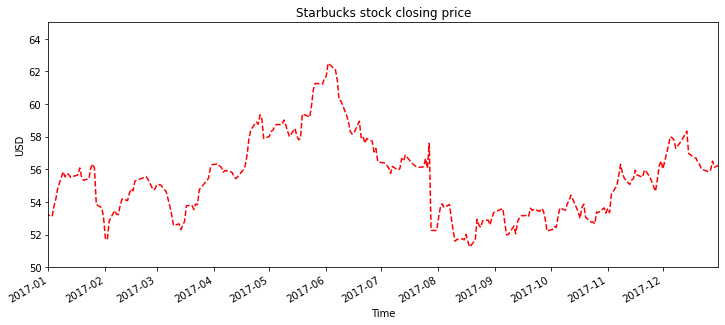

In [38]:
title = 'Starbucks stock closing price'
xlabel = 'Time'
ylabel = 'USD'
ax = strb_df['Close'].plot(figsize = (12,5), title=title, xlim =['2017-01-01','2017-12-31'], ylim=[50,65], ls='--', c='red');
ax.set(xlabel=xlabel, ylabel=ylabel);

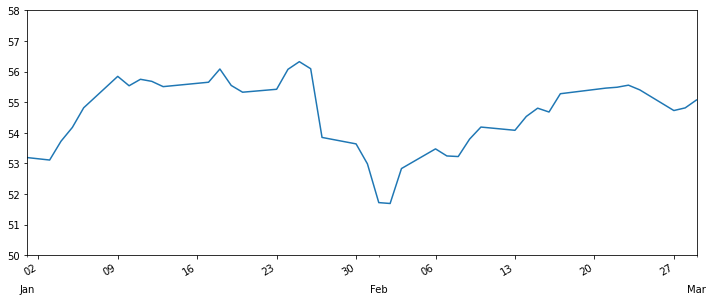

In [52]:
ax = strb_df['Close'].plot(figsize = (12,5), xlim =['2017-01-01','2017-3-01'], ylim = [50,58]);
ax.set(xlabel='');
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))